In [ ]:
import pm4py
import pandas as pd

### pm4py key links

https://pm4py.fit.fraunhofer.de/static/assets/api/2.7.8/index.html

https://pm4py-source.readthedocs.io/en/latest/_modules/index.html

https://pm4py-source.readthedocs.io/en/latest/py-modindex.html



In [2]:
filename = ('SampleData_AP_Refunds_Financial_EventLog .csv')

In [3]:
data = pd.read_csv(filename)

In [4]:
data.head(3)

,Location,Role,VendorID,InvoiceValue,Resource,StartTimestamp,EndTimestamp,CaseId,ActivityName
0,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 09:23:50.502475,2022-07-28 17:59:05.502475,0,Invoice Entry
1,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-28 17:59:05.502475,2022-07-29 00:43:19.302475,0,Check Customer Payment
2,"San Diego, USA",Invoice Processor,Vendor2,729.27,Casey,2022-07-29 09:43:19.302475,2022-07-29 15:04:04.902475,0,Credit Memo Entry


## Read Dataset in pm4py

In pm4py the dataset is called "log"

In [20]:
log = pm4py.format_dataframe(data, 
                              case_id='CaseId', 
                              activity_key='ActivityName', 
                              timestamp_key='EndTimestamp', 
                              start_timestamp_key='StartTimestamp', 
                              timest_format='%Y-%m-%d %H:%M:%S%z')

In [6]:
# Discover starting and ending activities
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)

In [7]:
start_activities

{'Invoice Entry': 133}

In [8]:
end_activities

{'Re-issuing the invoice': 133}

In [ ]:
# # the log is filtered on the top 5 variants - it keeps only data for top x variants
# filtered_log = pm4py.filter_variants_top_k(data, 5)

# Visualise the process
### Comparing process discovery algorithms
#### Alpha Miner
Alpha Miner was perhaps the first process discovery algorithm. Most of the algorithms subsequently developed were refinements and embellishments on it (Van der Aalst, 2016). Its main limitation is that it does not take into account event frequencies and does not guarantee soundness (see above). It also only really works for event logs without noise, which is rarely the case in real world data.

#### Heuristic Miner
Heuristics Miner (Weijters; Bogarin et al., 2016) takes into account event frequencies and ignores exceptional behaviour (low frequency events and event sequences), single events, and short loops (which you can see as self-contained events at a higher level). However, like alpha miner, it does not guarantee soundness.

Heuristics miner is most suitable when the number of event types is small (can fit in a human brain). By ignoring exceptional low frequency events and event sequences, it allows you to infer a parsimonious model from noisy real-world data.

#### Inductive Miner
Like heuristics miner, inductive miner takes into account event frequencies and ignores low-frequency events and isolated events/event loops. As an improvement to both alpha miner and heuristics miner, it also, guarantees soundness.

# Inductive Miner -  Process Tree  & BPMN visualisation

In [9]:
# Discover process tree using inductive miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
# Discover process tree using inductive miner
tree = inductive_miner.apply_tree(log)

from pm4py.visualization.process_tree import visualizer as pt_visualizer

# # Visualise the tree
# gviz = pt_visualizer.apply(tree)
# pt_visualizer.view(gviz)

In [10]:
# Generate process Tree using inductive miner
tree = pm4py.discover_process_tree_inductive(log)

In [11]:
# Convert Tree to BPMN diagram
bpmn_graph = pm4py.convert_to_bpmn(tree)

In [12]:
from pm4py.objects.bpmn.layout import layouter
# Organising the layout of BPMN diagram -
"""A layouting operation tries to give a good position to the nodes and the edges of the BPMN diagram. 
For our purposes, we chose an octilinear edges layout.
"""
bpmn_graph = layouter.apply(bpmn_graph)

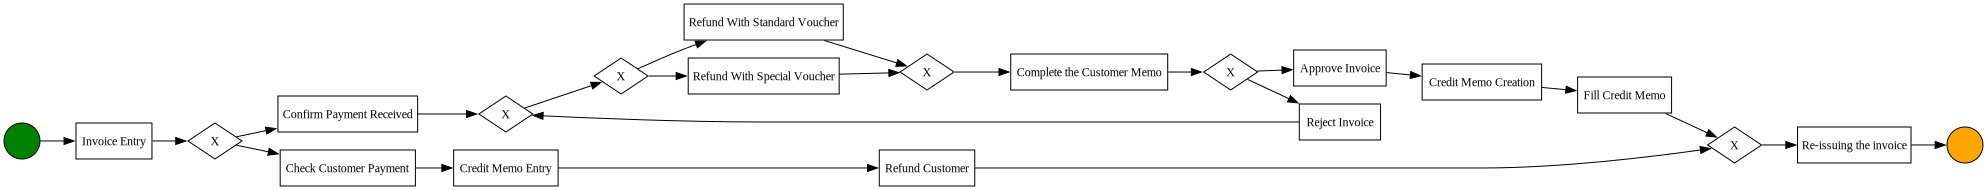

In [13]:
# Visualise BPMN
pm4py.visualization.bpmn.visualizer.apply(bpmn_graph)

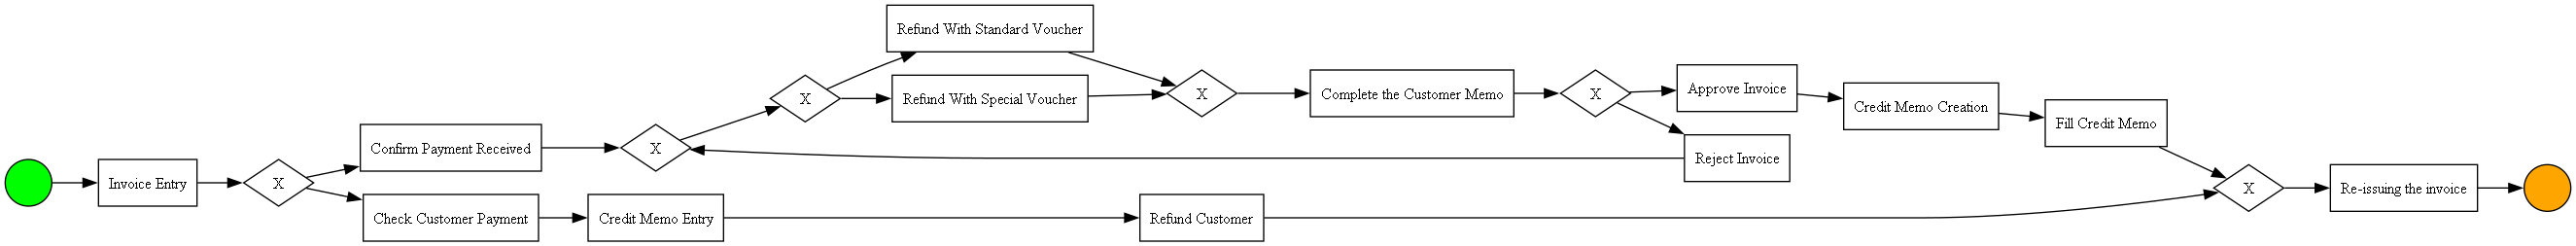

In [21]:
process_model = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(process_model)

In [ ]:
# Exporting BPMN
pm4py.write_bpmn(bpmn_graph, "BPMN_pm4py.bpmn")

## Directly Follow Diagram (dfg) discovery algorithm (Preferred)

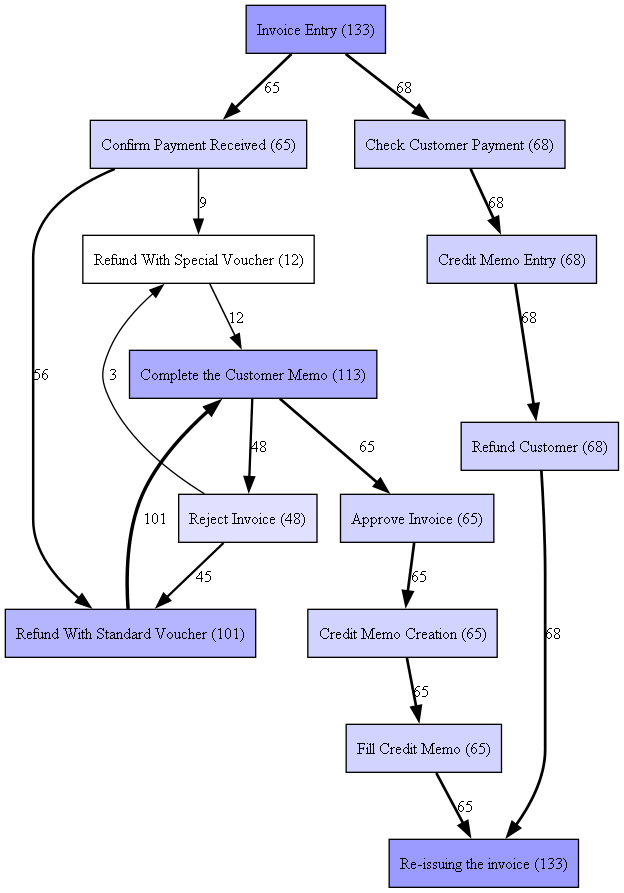

In [14]:
## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization

# ability to filter based on activity & path percentages
from pm4py.algo.filtering.dfg import dfg_filtering

#Create graph from log
dfg = dfg_discovery.apply(log)

# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

## Simplify using Activity & Paths percentages

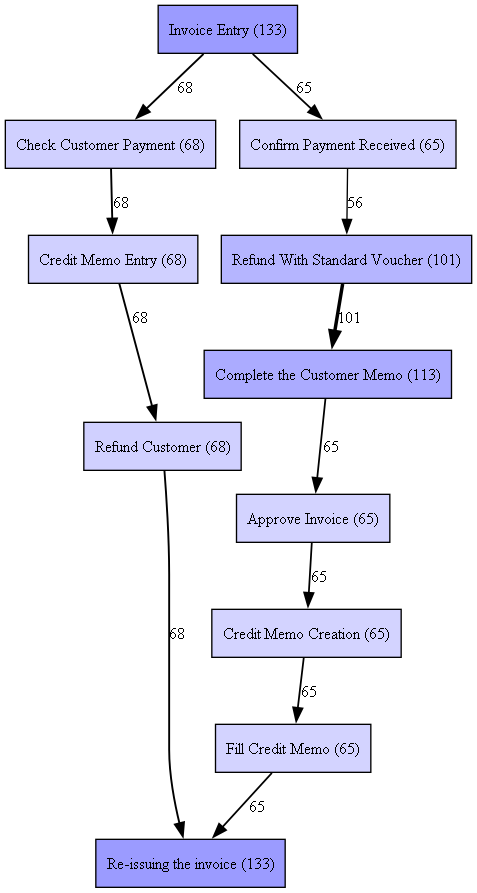

In [16]:

ACTIVITY_PERCENT = 0.5
PATH_PERCENT = 0.5

#Create graph from log
dfg, sa, ea = pm4py.discover_directly_follows_graph(log)

#Count the number of activity occurances; concept:name is the attribute reporting the activity
activities_count = pm4py.get_event_attribute_values(log, "concept:name")


# Filter on Activity Percentage
dfg, sa, ea, activities_count = dfg_filtering.filter_dfg_on_activities_percentage(dfg, sa, ea, activities_count, ACTIVITY_PERCENT)

# Filter on Path Percentage
dfg, sa, ea, activities_count = dfg_filtering.filter_dfg_on_paths_percentage(dfg, sa, ea, activities_count, PATH_PERCENT)

# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

## Different view using resources

### I'll replace the acitivities for Roles to get a different view

In [17]:
log = pm4py.format_dataframe(data, 
                              case_id='CaseId', 
                              activity_key='Role', 
                              timestamp_key='EndTimestamp', 
                              start_timestamp_key='StartTimestamp', 
                              timest_format='%Y-%m-%d %H:%M:%S%z')

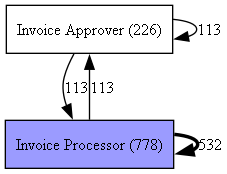

In [18]:
## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization

#Create graph from log
dfg = dfg_discovery.apply(log)

# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)